## Correlation Analysis in between features and features versus continuous metadata

**Author**: Madeleine Ernst (mernst@ucsd.edu) adapted from Ricardo Silva (ridasilva@ucsd.edu) <br>
**Edited by**: - <br>
**Use case**: Test for association between paired samples (feature vs metadata and feature vs feature), using the Pearson's product moment correlation coefficient. <br>
**Input file format**: .csv table with features and metadata in rows and samples in columns. All metadata should be continuous data. <br>
**Outputs**: (Interactive) heatmaps showing correlation coefficients for visual inspection (feature vs metadata and feature vs feature). Tables showing p-values (corrected for multiple comparisons using the Bonferroni method), correlation coefficients as well as R2 for all paired samples. <br>
**Dependencies**: R version 3.4.2 (2017-09-28) and libraries d3heatmap_0.6.1.1, Hmisc_4.0-2, htmlwidgets_0.8, pheatmap_1.0.8, plyr_1.8.4, reshape_0.8.7

load libraries

In [5]:
install.packages('d3heatmap')
install.packages('Hmisc')
install.packages('htmlwidgets')
install.packages('pheatmap')
install.packages('plyr')
install.packages('reshape')
install.packages('RColorBrewer')

Warning message:
"package 'd3heatmap' is not available (for R version 3.6.1)"also installing the dependencies 'deldir', 'RcppEigen', 'png', 'jpeg', 'interp', 'checkmate', 'viridisLite', 'survival', 'Formula', 'latticeExtra', 'gridExtra', 'htmlTable', 'viridis'




  There are binary versions available but the source versions are later:
                binary    source needs_compilation
deldir          0.2-10     1.0-6              TRUE
RcppEigen    0.3.3.9.1 0.3.3.9.2              TRUE
jpeg           0.1-8.1     0.1-9              TRUE
interp          1.0-33     1.1-3              TRUE
checkmate        2.0.0     2.1.0              TRUE
survival        3.2-11     3.4-0              TRUE
latticeExtra    0.6-29    0.6-30             FALSE
htmlTable        2.1.0     2.4.1             FALSE
viridis          0.6.1     0.6.2             FALSE
Hmisc            4.5-0     4.7-0              TRUE

  Binaries will be installed
package 'deldir' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'png' successfully unpacked and MD5 sums checked
package 'jpeg' successfully unpacked and MD5 sums checked
package 'interp' successfully unpacked and MD5 sums checked
package 'checkmate' successfully unpa

installing the source packages 'latticeExtra', 'htmlTable', 'viridis'




  There is a binary version available but the source version is later:
            binary source needs_compilation
htmlwidgets  1.5.3  1.5.4             FALSE



installing the source package 'htmlwidgets'



package 'pheatmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abzer\AppData\Local\Temp\RtmpCO7vMv\downloaded_packages

  There is a binary version available but the source version is later:
     binary source needs_compilation
plyr  1.8.6  1.8.7              TRUE

  Binaries will be installed
package 'plyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abzer\AppData\Local\Temp\RtmpCO7vMv\downloaded_packages

  There is a binary version available but the source version is later:
        binary source needs_compilation
reshape  0.8.8  0.8.9              TRUE

  Binaries will be installed
package 'reshape' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abzer\AppData\Local\Temp\RtmpCO7vMv\downloaded_packages

  There is a binary version available but the source version is later:
             binary source needs_compilation
RColorBrewer  1.1-2  1.1-3   

installing the source package 'RColorBrewer'



In [9]:
library('d3heatmap')
library(Hmisc)
library(htmlwidgets)
library(pheatmap)
library(plyr)
library(reshape)
library(RColorBrewer)

ERROR: Error in library("d3heatmap"): there is no package called 'd3heatmap'


Load your input file (try to avoid special characters such as -,@,% etc. in both column and rownames) <br> 
Change the text in "" to your filename

In [2]:
data <- read.csv("Correlation_Met_16S_18Sv9_Genues_filtered_IDs_1E8_1E4_1E4_corr_input_microbes_only.csv")
data

Scan_Number,CCE_P1706_39,CCE_P1706_40,CCE_P1706_41,CCE_P1706_42,CCE_P1706_43,CCE_P1706_44,CCE_P1706_45,CCE_P1706_46,CCE_P1706_47,⋯,CCE_P1706_219,CCE_P1706_220,CCE_P1706_221,CCE_P1706_222,CCE_P1706_223,CCE_P1706_224,CCE_P1706_227,CCE_P1706_228,CCE_P1706_229,CCE_P1706_230
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Bacteria_Proteobacteria_Deltaproteobacteria_Desulfurellales_Desulfurellaceae_uncultured,204,204,165,165,21,21,11,11,0,⋯,329,329,174,174,61,61,0,0,0,0
Bacteria_Proteobacteria_Deltaproteobacteria_Desulfobacterales_Nitrospinaceae_uncultured,107,107,50,50,17,17,26,26,1,⋯,100,100,128,128,73,73,249,249,278,278
Bacteria_Proteobacteria_Deltaproteobacteria_Desulfobacterales_Desulfobulbaceae_Desulfocapsa,57,57,59,59,47,47,34,34,12,⋯,68,68,70,70,86,86,208,208,155,155
Bacteria_Proteobacteria_Deltaproteobacteria_Desulfobacterales_Nitrospinaceae_Nitrospina,13,13,32,32,52,52,50,50,27,⋯,29,29,30,30,44,44,124,124,106,106
Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_PAUC34f_uncultured gamma proteobacterium,0,0,11,11,12,12,29,29,51,⋯,32,32,12,12,27,27,335,335,236,236
Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_PAUC34f_uncultured bacterium,11,11,51,51,78,78,118,118,30,⋯,12,12,23,23,69,69,50,50,30,30
Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_SAR406 clade(Marine group A)_marine metagenome,296,296,249,249,91,91,87,87,2,⋯,324,324,124,124,56,56,2,2,0,0
Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_SAR406 clade(Marine group A)_uncultured marine bacterium 159,0,0,2,2,20,20,60,60,32,⋯,2,2,0,0,6,6,1931,1931,1880,1880
Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_SAR406 clade(Marine group A)_uncultured SAR406 cluster bacterium,120,120,89,89,26,26,18,18,1,⋯,149,149,189,189,225,225,4,4,6,6


Transpose your data table and put it into the format that will be used for the correlation analysis

In [3]:
datat <- t(data)
colnames(datat)<- datat[1,]
datat <- datat[-1,]
datat <- as.data.frame(datat,stringsAsFactors=F)
datat <- as.data.frame(sapply(datat, as.numeric))
rownames(datat)<- colnames(data)[-1]
tab <- datat

In [4]:
# Normalize the features by TIC and adding 1 to all feature intensities 
tab2 <- tab
tab2$SampleNames <- rownames(tab2)
tab2 <- tab2[,c(which(colnames(tab2)=="SampleNames"),1:(ncol(tab2)-1))]
nonfeatures <- c(1:1) # Define Metadata Here_DP
tab2[,-nonfeatures] <- t(apply(tab2[,-nonfeatures], 1, function(x) (x+1)/sum((x+1))))

In [5]:
head(tab2)

,SampleNames,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfurellales_Desulfurellaceae_uncultured,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfobacterales_Nitrospinaceae_uncultured,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfobacterales_Desulfobulbaceae_Desulfocapsa,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfobacterales_Nitrospinaceae_Nitrospina,Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_PAUC34f_uncultured gamma proteobacterium,Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_PAUC34f_uncultured bacterium,Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_SAR406 clade(Marine group A)_marine metagenome,Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_SAR406 clade(Marine group A)_uncultured marine bacterium 159,Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_SAR406 clade(Marine group A)_uncultured SAR406 cluster bacterium,⋯,Eukaryota_Rhizaria_Radiolaria_Acantharea_Acantharea-Group-VI_Acantharea-Group-VI_X_Acantharea-Group-VI_XX,Eukaryota_Rhizaria_Radiolaria_Acantharea_Arthracanthida-Symphyacanthida_Arthracanthida-Symphyacanthida_X_Acanthometra,Eukaryota_Rhizaria_Radiolaria_Acantharea_Chaunacanthida_Chaunacanthida_X_Chaunacanthid,Eukaryota_Rhizaria_Radiolaria_Acantharea_Acantharea-Group-I_Acantharea-Group-I_X_Acantharea-Group-I_XX,Eukaryota_Rhizaria_Radiolaria_Acantharea_Acantharea_X_Acantharea_XX_Acantharea_XXX,Eukaryota_Rhizaria_Radiolaria_Acantharea_Chaunacanthida_Chaunacanthida_X_Chaunacanthida_XX,4fe3af381c8225750d3e4b9f82b0e9677808c347_107______,90e6f422b9330a711aff029afc187c815940e4e7_78______,8ba872f3d64b98d50c2ba61dc590d9a144853bcb_84______,0a409a23b9a439299d4ef1deac4bcce5829d6c58_147______
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CCE_P1706_39,CCE_P1706_39,0.0031130886,0.0016400662,0.0008807763,0.0002126012,0.0000151858,0.0001822296,0.004510182,1.518580e-05,0.0018374816,⋯,0.0002277870,0.003173832,1.063006e-04,0.04347694,0.02646885,0.003386433,0.001898225,0.08469120,0.003356061,0.008640719
CCE_P1706_40,CCE_P1706_40,0.0031130886,0.0016400662,0.0008807763,0.0002126012,0.0000151858,0.0001822296,0.004510182,1.518580e-05,0.0018374816,⋯,0.0002277870,0.003173832,1.063006e-04,0.04347694,0.02646885,0.003386433,0.001898225,0.08469120,0.003356061,0.008640719
CCE_P1706_41,CCE_P1706_41,0.0026932749,0.0008274519,0.0009734729,0.0005354101,0.0001946946,0.0008436765,0.004056137,4.867364e-05,0.0014602093,⋯,0.0003244910,0.003877667,4.867364e-05,0.03538574,0.01852843,0.006084205,0.002287661,0.05271356,0.005938184,0.053687028
CCE_P1706_42,CCE_P1706_42,0.0026932749,0.0008274519,0.0009734729,0.0005354101,0.0001946946,0.0008436765,0.004056137,4.867364e-05,0.0014602093,⋯,0.0003244910,0.003877667,4.867364e-05,0.03538574,0.01852843,0.006084205,0.002287661,0.05271356,0.005938184,0.053687028
CCE_P1706_43,CCE_P1706_43,0.0004307138,0.0003524022,0.0009397392,0.0010376287,0.0002545127,0.0015466541,0.001801167,4.111359e-04,0.0005286033,⋯,0.0004894475,0.067054309,3.915580e-05,0.01957790,0.02141822,0.002721328,0.010356709,0.01891225,0.023141078,0.124456713
CCE_P1706_44,CCE_P1706_44,0.0004307138,0.0003524022,0.0009397392,0.0010376287,0.0002545127,0.0015466541,0.001801167,4.111359e-04,0.0005286033,⋯,0.0004894475,0.067054309,3.915580e-05,0.01957790,0.02141822,0.002721328,0.010356709,0.01891225,0.023141078,0.124456713


Calculate the correlation coefficient in between metadata or single features. <br>
Scale should help correlation - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1534033/ <br>
e.g. calculate the correlation between the second column of tab2 (Transmission) and the third column (Tempearture):

<tt> cor.test(scale(tab2[,2])[,1], scale(tab2[,3])[,1])[c("estimate", "p.value")] <tt> 

In [6]:
#Calculate the correlation coefficient between a single feature and the bioactivity.
# Scale should help correlation - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1534033/
cor.test(scale(tab2[,2])[,1], scale(tab2[,3])[,1])[c("estimate", "p.value")]

$estimate
       cor 
0.06826001 

$p.value
[1] 0.4195718

### Calculate the correlation of each feature with metadata

In [7]:
ct <- list()
for (i in 2:length(nonfeatures)){
  ct[[i]] <- t(sapply((length(nonfeatures)+1):ncol(tab2), function(x) unlist(cor.test(scale(tab2[,i])[,1], scale(tab2[,x])[,1])[c("estimate", "p.value")])))
}

ctm <- list()

for (i in 2:length(ct)){
  
  ph <- matrix(0,nrow=length(nonfeatures)-1,ncol=2)
  
  ct1 <- rbind(c("cor"," p_value"), ph, ct[[i]])
  tab3 <- rbind(t(ct1),  as.matrix(tab2))
  rownames(tab3) <- NULL
  tab3[1:5, 1:5]
  #write.csv(tab3, "features_quantification_matrix_edited_with_correlation.csv", row.names=FALSE)
  
  # Tranpose the table for molecular networking mapping in Cytoscape
  new = t(tab3)
  colnames(new) = new[1,]
  new = new[-1,]
  new = cbind(c(rep(0,length(nonfeatures)-1),1:(nrow(new)-length(nonfeatures)+1)), rownames(new),new)
  rownames(new) <- NULL
  colnames(new)[1:2] <- c("shared name", "IDs")
  new[1:(length(nonfeatures)-1),1] <- ""
  #new[1:5,1:5]
  
  # Features passing Bonferronii method
  # Prepare the new table
  new2 <- cbind(new[,1:4], c(rep(0,(length(nonfeatures)-1)), p.adjust(as.numeric(ct1[-c(1:length(nonfeatures)),2]), method = "bonferroni")), new[,-c(1:4)])
  colnames(new2)[5] <- "p_value_corrected"
  #new2[1:20,1:10]
  ctm[[i]] <- new2
}

names(ctm) <- colnames(tab2)[nonfeatures]
x <- ctm[[2]][,2]
x2 <- ctm[[2]][,2]# change here if you want to change to feature numbers instead of names ctm[[2]][,1]

for (i in 2:length(ctm)){
  x <- cbind(x,ctm[[i]][,which(colnames(ctm[[i]])=="p_value_corrected")])
  x2 <- cbind(x2,ctm[[i]][,which(colnames(ctm[[i]])=="cor")])
}

colnames(x) <- names(ctm)
x <- x[-nonfeatures[-(length(nonfeatures))],]
colnames(x2) <- names(ctm)
x2 <- x2[-nonfeatures[-(length(nonfeatures))],]

*x2* is a matrix, containing features in rows and metadata in columns, the values correspond to the Pearson's product moment correlation coefficient (r) <br>
*x* is a matrix, containing features in rows and metadata in columns, the values correspond to the p-value (corrected for multiple comparisons using the Bonferroni method)

In [8]:
head(x)
head(x2)

SampleNames,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfurellales_Desulfurellaceae_uncultured,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfobacterales_Nitrospinaceae_uncultured,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfobacterales_Desulfobulbaceae_Desulfocapsa,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfobacterales_Nitrospinaceae_Nitrospina,Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_PAUC34f_uncultured gamma proteobacterium,Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_PAUC34f_uncultured bacterium,Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_SAR406 clade(Marine group A)_marine metagenome,Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_SAR406 clade(Marine group A)_uncultured marine bacterium 159,Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_SAR406 clade(Marine group A)_uncultured SAR406 cluster bacterium,⋯,Eukaryota_Rhizaria_Radiolaria_Acantharea_Arthracanthida-Symphyacanthida_Arthracanthida-Symphyacanthida_X_Acanthometra,Eukaryota_Rhizaria_Radiolaria_Acantharea_Chaunacanthida_Chaunacanthida_X_Chaunacanthid,Eukaryota_Rhizaria_Radiolaria_Acantharea_Acantharea-Group-I_Acantharea-Group-I_X_Acantharea-Group-I_XX,Eukaryota_Rhizaria_Radiolaria_Acantharea_Acantharea_X_Acantharea_XX_Acantharea_XXX,Eukaryota_Rhizaria_Radiolaria_Acantharea_Chaunacanthida_Chaunacanthida_X_Chaunacanthida_XX,4fe3af381c8225750d3e4b9f82b0e9677808c347_107______,90e6f422b9330a711aff029afc187c815940e4e7_78______,8ba872f3d64b98d50c2ba61dc590d9a144853bcb_84______,0a409a23b9a439299d4ef1deac4bcce5829d6c58_147______,10069
131845,1,0.21494721252509,1,1,0.00765728370326169,1,1,7.00436312317285e-28,1,⋯,1,0.00111482405693616,1,1,1,1,1,1,1,1
62959,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
88795,1,1,1,0.164791423162358,1,1,1,1,1,⋯,1,1,1,0.420651973056944,1,1,1,1,1,1
18236,1,1,1,1,1,1,1,1,0.567585164000598,⋯,1,1,1,1,1,1,0.128412988246987,1,1,1
16029,0.00315938382706674,1,1,1,1,1,0.00661554916640051,1,1,⋯,1,1,1,1,1,1,1,1,1,1
1778,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1


SampleNames,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfurellales_Desulfurellaceae_uncultured,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfobacterales_Nitrospinaceae_uncultured,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfobacterales_Desulfobulbaceae_Desulfocapsa,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfobacterales_Nitrospinaceae_Nitrospina,Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_PAUC34f_uncultured gamma proteobacterium,Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_PAUC34f_uncultured bacterium,Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_SAR406 clade(Marine group A)_marine metagenome,Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_SAR406 clade(Marine group A)_uncultured marine bacterium 159,Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_SAR406 clade(Marine group A)_uncultured SAR406 cluster bacterium,⋯,Eukaryota_Rhizaria_Radiolaria_Acantharea_Arthracanthida-Symphyacanthida_Arthracanthida-Symphyacanthida_X_Acanthometra,Eukaryota_Rhizaria_Radiolaria_Acantharea_Chaunacanthida_Chaunacanthida_X_Chaunacanthid,Eukaryota_Rhizaria_Radiolaria_Acantharea_Acantharea-Group-I_Acantharea-Group-I_X_Acantharea-Group-I_XX,Eukaryota_Rhizaria_Radiolaria_Acantharea_Acantharea_X_Acantharea_XX_Acantharea_XXX,Eukaryota_Rhizaria_Radiolaria_Acantharea_Chaunacanthida_Chaunacanthida_X_Chaunacanthida_XX,4fe3af381c8225750d3e4b9f82b0e9677808c347_107______,90e6f422b9330a711aff029afc187c815940e4e7_78______,8ba872f3d64b98d50c2ba61dc590d9a144853bcb_84______,0a409a23b9a439299d4ef1deac4bcce5829d6c58_147______,10069
131845,-0.23725363925173,0.321117711751029,0.255617989652184,0.110572371947873,0.378192981161183,0.0100448994256546,-0.208305762750388,0.787498370854295,-0.219033545702649,⋯,0.236739383056714,0.40681349588461,0.00990145659849559,-0.160007758199579,-0.0754491299601033,-0.0861493242746952,0.115650387752966,-0.148112424623875,0.0548005990832273,-0.0398780733174772
62959,0.128015375347121,0.0800731185172792,0.0755530389838944,-0.0186989400085927,0.00928578385744643,-0.066703793386569,0.136895316931288,-0.0178793725413666,0.1042001332314,⋯,-0.0941315111575518,0.108827484852372,0.0248347403344966,0.0071667580562866,-0.0455269231397744,-0.131706081053179,0.119732656769209,-0.158939457476707,-0.103481865519384,-0.0966382706094068
88795,-0.21547449946733,-0.0674875085207452,0.225215231538722,0.326096640238085,-0.0990953839079751,-0.118880851821151,-0.198169721343675,-0.0143326163803314,0.0878937539079393,⋯,0.165878801152741,-0.0521569641225809,-0.144729257797195,-0.308135041411718,-0.116021734086764,-0.0655393689925221,-0.243401533956608,0.210757378369576,-0.0375688764973195,-0.042420910940673
18236,0.287343395254082,0.171489323920914,0.110362234010942,-0.0146636091173211,-0.09385184402207,-0.191258115694678,0.249457253647922,-0.0656019523781275,0.302143667362239,⋯,-0.261956646794175,-0.0842595426445372,0.126951256091508,0.0441972778732174,-0.117501367182259,-0.220458191348396,0.330693335795803,-0.209640275470857,-0.141700264908091,-0.122422575792615
16029,0.391675995837613,-0.0240140312981345,-0.152877937813986,-0.240249743939096,-0.0541283469866399,-0.0579942551752037,0.380461897156851,-0.11314305134512,0.168380520151039,⋯,-0.0747081398662814,-0.159795937594227,0.186710448760316,0.115014543282878,-0.0611699225433689,-0.253408997101385,0.206548834840578,-0.224550531916541,0.0373672311872535,-0.155280741395639
1778,0.102602845202518,-0.0887979892263347,-0.214451741888081,-0.200129581249432,-0.0857857792834705,-0.0497117491885343,0.149754807569225,-0.101338601241373,-0.073779086059491,⋯,0.0550679415412085,-0.0685714238747592,0.110696842809985,0.0028674506335223,-0.0430836833894403,0.0526405605370236,-0.0184300616959507,-0.0607190897810713,-0.0126125780470789,0.0170332379644603


create a heatmap of all correlation coefficients, the correlation coefficients are scaled, aiding visualization

In [9]:
# create p-value and correlation matrices for heatmap
correl <- apply(x2[,-1], 2, as.numeric)
rownames(correl) <- x2[,1]
head(t(correl))

,131845,62959,88795,18236,16029,1778,114757,20653,72862,700,⋯,51020,30091,18917,111841,111833,185,527,137,681,53486
Bacteria_Proteobacteria_Deltaproteobacteria_Desulfurellales_Desulfurellaceae_uncultured,-0.2372536,0.128015375,-0.21547450,0.28734340,0.39167600,0.10260285,-0.14731525,0.27170271,0.35879578,-0.14224089,⋯,-0.4455449,0.57835740,0.263583993,-0.189886619,-0.19567750,-0.2648292,-0.35519699,-0.2889917,-0.4696294,-0.32895957
Bacteria_Proteobacteria_Deltaproteobacteria_Desulfobacterales_Nitrospinaceae_uncultured,0.3211177,0.080073119,-0.06748751,0.17148932,-0.02401403,-0.08879799,0.09507182,0.05206477,0.07442005,-0.15156613,⋯,-0.3039591,0.05029344,-0.116055798,0.271508259,-0.11067814,-0.1817258,-0.21429664,-0.1615250,-0.3557609,-0.13477644
Bacteria_Proteobacteria_Deltaproteobacteria_Desulfobacterales_Desulfobulbaceae_Desulfocapsa,0.2556180,0.075553039,0.22521523,0.11036223,-0.15287794,-0.21445174,0.27659234,0.02494615,-0.07485628,-0.16407191,⋯,-0.3859399,0.05782296,0.026821738,0.150468893,-0.11919728,-0.2517663,-0.38592605,-0.1999616,-0.4840231,-0.19745673
Bacteria_Proteobacteria_Deltaproteobacteria_Desulfobacterales_Nitrospinaceae_Nitrospina,0.1105724,-0.018698940,0.32609664,-0.01466361,-0.24024974,-0.20012958,0.43611681,-0.08584739,-0.14169437,-0.08752751,⋯,-0.1183512,-0.11033638,-0.005466321,-0.004940615,-0.06563828,-0.1231886,-0.17896191,-0.1109686,-0.2170244,-0.09194732
Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_PAUC34f_uncultured gamma proteobacterium,0.3781930,0.009285784,-0.09909538,-0.09385184,-0.05412835,-0.08578578,-0.10618338,-0.18702012,-0.17944106,-0.11664440,⋯,0.4482995,-0.39657406,-0.164291575,0.368768002,-0.10895388,0.4497430,0.06874423,-0.1402029,0.3991642,-0.10211536
Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_PAUC34f_uncultured bacterium,0.0100449,-0.066703793,-0.11888085,-0.19125812,-0.05799426,-0.04971175,-0.10163511,-0.14746134,-0.16317122,-0.12959508,⋯,0.7143277,-0.30273069,-0.135148996,0.043086657,-0.12193263,0.5633738,0.28456427,-0.1781494,0.6777379,-0.16949232


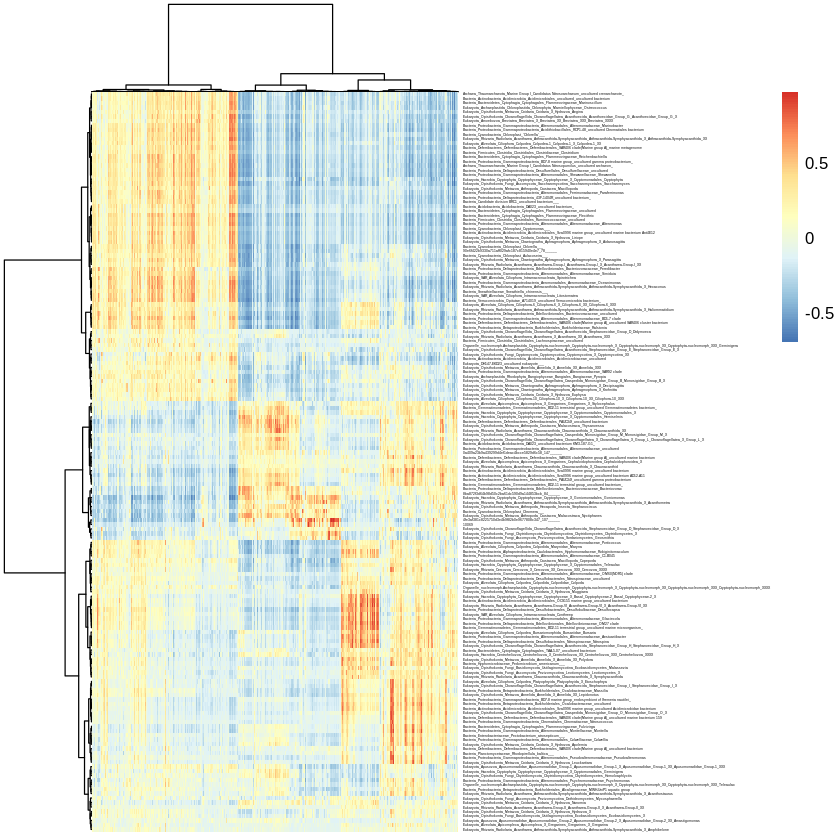

In [11]:
# create heatmap
pheatmap(t(correl),  clustering_method="ward.D", clustering_distance_cols="canberra", show_colnames=FALSE,show_rownames=TRUE, cluster_rows=TRUE, cluster_cols=TRUE, fontsize_row=2)

create an interactive heatmap of all correlation coefficients <br>
you can download this file to your computer

In [12]:
# interactive 3d map
map <- d3heatmap(t(correl), distfun=function(x) dist(x, method="canberra"), hclustfun=function(x) hclust(x, method="ward.D"),color = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(100))
saveWidget(map, "corrcoef_all.html") 

Create heatmap with features with no siginificant p-value for the correlation coefficient in none of the metadata categories removed

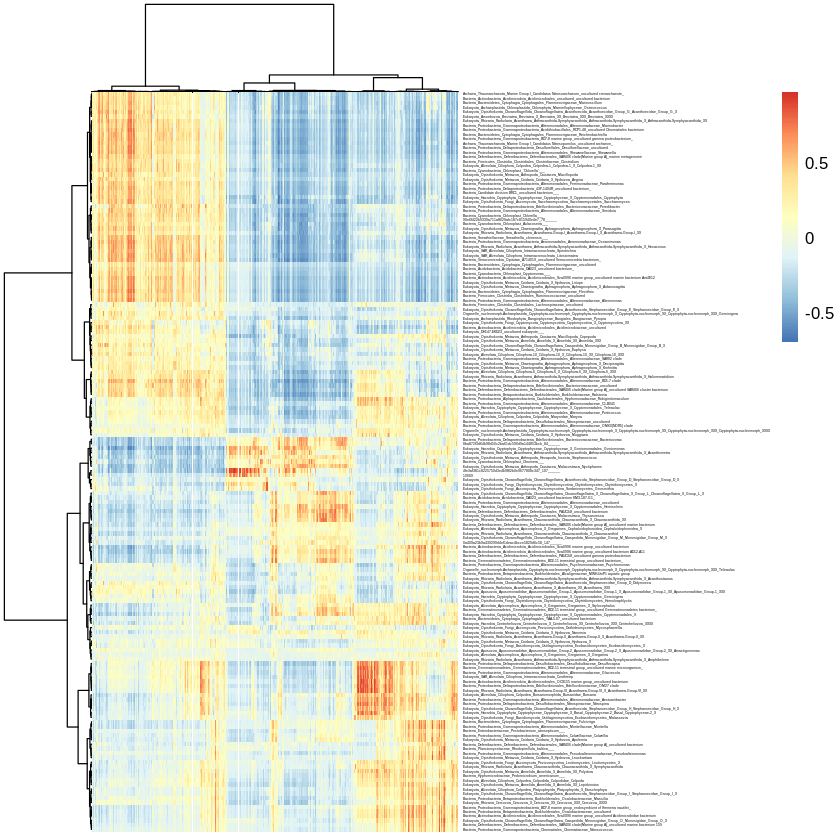

In [14]:
# remove features with - low p-value
pval <- apply(x[,-1], 2, as.numeric)
rownames(pval) <- x[,1]
rcorrel <- correl[-which(apply(pval,1,min)>0.001),]

# create heatmap
pheatmap(t(rcorrel),  clustering_method="ward.D", clustering_distance_cols="canberra", show_colnames=FALSE,show_rownames=TRUE, cluster_rows=TRUE, cluster_cols=TRUE, fontsize_row=2)

create interactive heatmap with features with no siginificant p-value for the correlation coefficient in none of the metadata categories removed

In [15]:
# interactive 3d map
map <- d3heatmap(t(rcorrel), distfun=function(x) dist(x, method="canberra"), hclustfun=function(x) hclust(x, method="ward.D"),color = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(100))
saveWidget(map, "corrcoef_sig0001.html") 

create output tables

In [16]:
# create output tables
y <- as.data.frame(x,stringsAsFactors = F)
y2 <- as.data.frame(x2,stringsAsFactors = F)
y$SampleNames <- as.factor(y$SampleNames)
y2$SampleNames <- as.factor(y2$SampleNames)
y[,-1] <- sapply(y[,-1], as.numeric)
y2[,-1] <- sapply(y2[,-1], as.numeric)

y <- melt(y)
y2 <- melt(y2)

y3 <- cbind(y[,c(1:3)],y2[,3])
y3 <- cbind(y3, (y2[,3])^2)
colnames(y3)[c(1,3:5)] <- c("Feature","pvalue","correlation_coef","r2")
head(y3)
dim(y3)

Using SampleNames as id variables
Using SampleNames as id variables


Feature,variable,pvalue,correlation_coef,r2
<fct>,<fct>,<dbl>,<dbl>,<dbl>
131845,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfurellales_Desulfurellaceae_uncultured,1.000000000,-0.2372536,0.05628929
62959,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfurellales_Desulfurellaceae_uncultured,1.000000000,0.1280154,0.01638794
88795,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfurellales_Desulfurellaceae_uncultured,1.000000000,-0.2154745,0.04642926
18236,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfurellales_Desulfurellaceae_uncultured,1.000000000,0.2873434,0.08256623
16029,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfurellales_Desulfurellaceae_uncultured,0.003159384,0.3916760,0.15341009
1778,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfurellales_Desulfurellaceae_uncultured,1.000000000,0.1026028,0.01052734


[1] 363330      5

write output table to file

In [17]:
# write table to file
write.table(y3,"CorrelationTable_16S-18Sv9-Metabo_Filtered_ID_1E8_1E4_1E4.csv",row.names = F,quote = F,sep=";")

histogram of log values of p-values

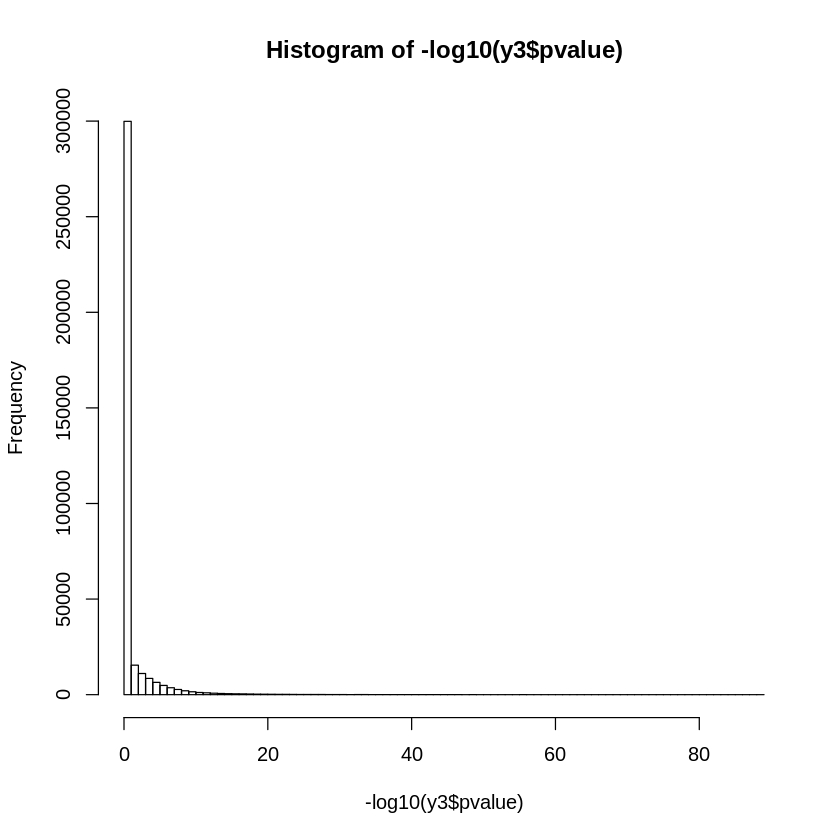

In [18]:
hist(-log10(y3$pvalue),breaks=100)

histogram of correlation coefficients (r)

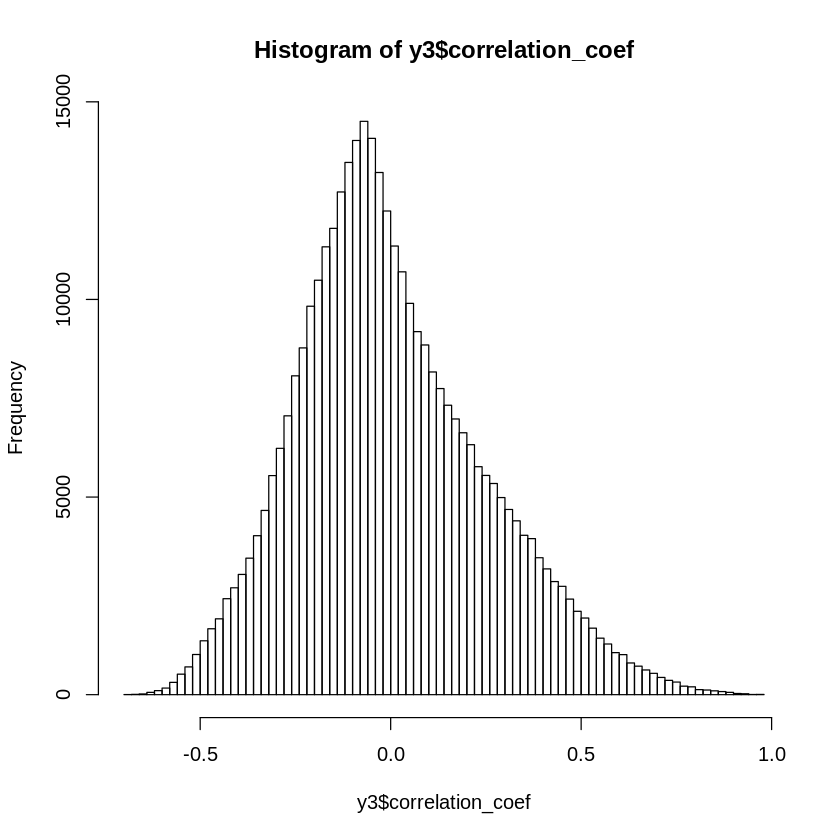

In [19]:
hist(y3$correlation_coef,breaks=100)

### Calculate the correlation of each feature with all remaining features

In [7]:
ccs <- as.matrix(tab2[,-nonfeatures])
corrions <- rcorr(ccs, type="pearson") # You can also use "spearman"

create heatmap of correlation coefficient with all features

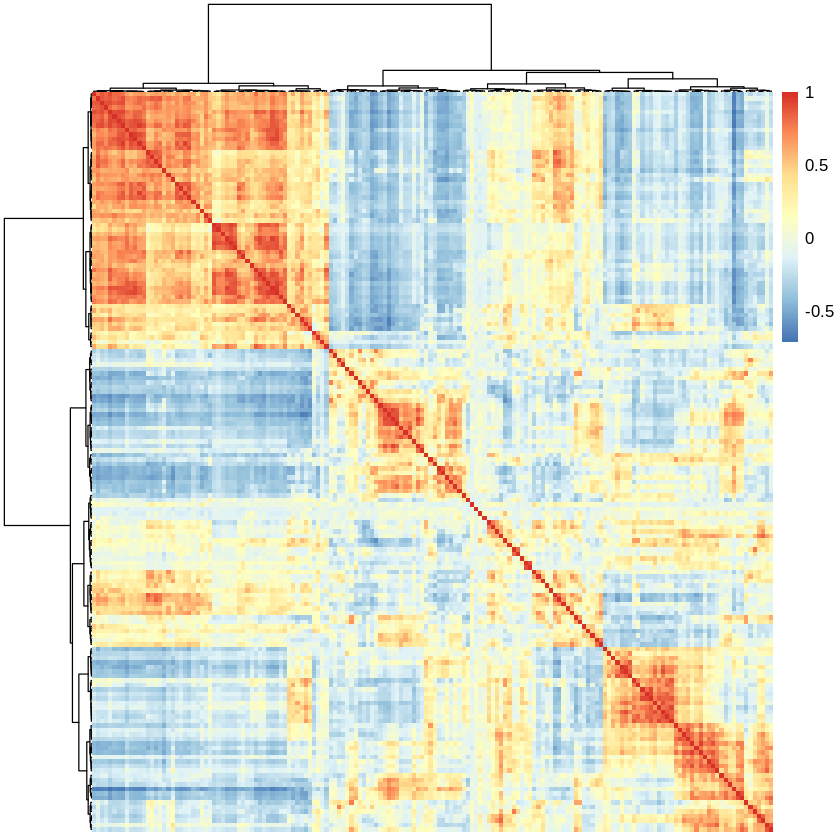

In [8]:
# create heatmap
pheatmap(corrions$r, clustering_method="ward.D", clustering_distance_cols="euclidean", show_colnames=FALSE, show_rownames=FALSE, cluster_rows=TRUE, cluster_cols=TRUE, fontsize_row=5)

create interactive heatmap <br>
**careful: depending on how many features you have this might take a long time, if you want to save time skip this step**

In [9]:
# interactive 3d map
map <- d3heatmap(corrions$r, distfun=function(x) dist(x, method="euclidean"), hclustfun=function(x) hclust(x, method="ward.D"),color = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(100))
saveWidget(map, "corrcoef_features_microbes_only.html") 

remove features, which show no significant p-value for any other feature

In [10]:
pcorrected <- p.adjust(as.vector(corrions$P))
pcorrected <- matrix(pcorrected,nrow=nrow(corrions$P),ncol=ncol(corrions$P))
colnames(pcorrected) <- rownames(pcorrected) <- colnames(corrions$P)

# remove features with no significant p-value
corrions_sig <- corrions$r[-which(apply(pcorrected,1,min,na.rm = TRUE)>0.001),]

create heatmap with reduced dataset <br>
**careful: depending on how many features you have this might take a long time, if you want to save time skip this step**

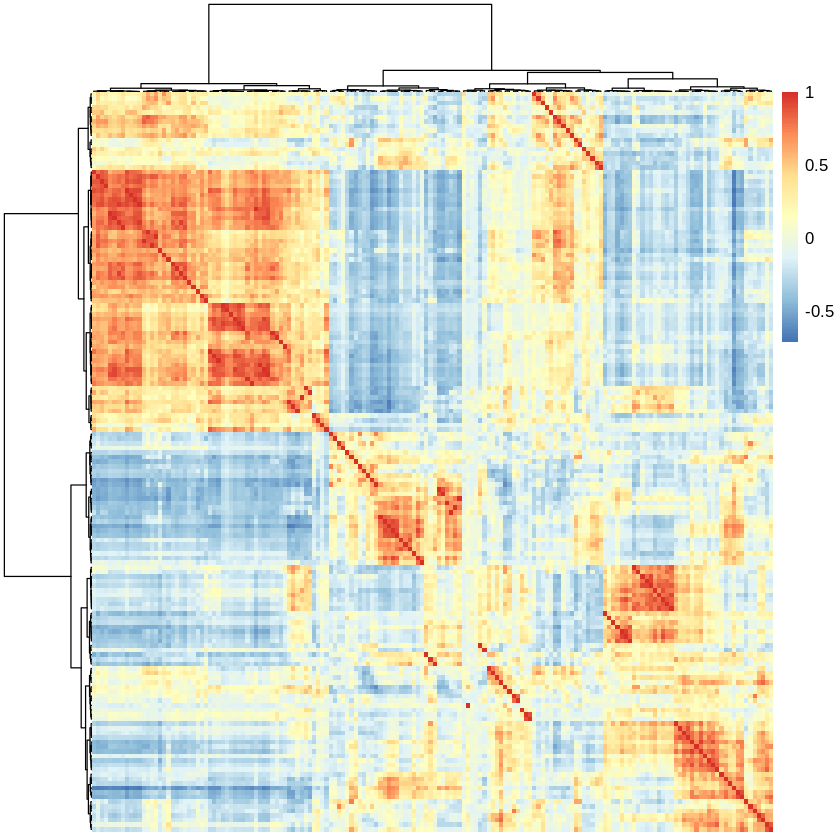

In [11]:
# create heatmap
pheatmap(corrions_sig,  clustering_method="ward.D", clustering_distance_cols="euclidean", show_colnames=FALSE,show_rownames=FALSE, cluster_rows=TRUE, cluster_cols=TRUE, fontsize_row=5)

create interactive heatmap with reduced matrix <br>
**careful: depending on how many features you have this might take a long time, if you want to save time skip this step**

In [12]:
# interactive 3d map
map <- d3heatmap(corrions_sig, distfun=function(x) dist(x, method="euclidean"), hclustfun=function(x) hclust(x, method="ward.D"),color = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(100))
saveWidget(map, "corrcoef_features_sig_microbes_only.html") 

create output tables

In [13]:
corrions2 <- as.data.frame(pcorrected,stringsAsFactors = F)
corrions2 <- cbind(rownames(corrions2),corrions2)
rownames(corrions2) <- NULL
colnames(corrions2)[1] <- "features"
corrions3 <- melt(corrions2)

cf <- as.data.frame(corrions$r,stringsAsFactors = F)
cf <- cbind(rownames(cf),cf)
rownames(cf) <- NULL
colnames(cf)[1] <- "features"
cf2 <- melt(cf)

allfeat <- cbind(corrions3[,c(1:3)],cf2[,3])
allfeat <- cbind(allfeat, (cf2[,3])^2)
colnames(allfeat)[c(1,3:5)] <- c("Feature","pvalue","correlation_coef","r2")
head(allfeat)
dim(allfeat)

Using features as id variables
Using features as id variables


Feature,variable,pvalue,correlation_coef,r2
<fct>,<fct>,<dbl>,<dbl>,<dbl>
Bacteria_Proteobacteria_Deltaproteobacteria_Desulfurellales_Desulfurellaceae_uncultured,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfurellales_Desulfurellaceae_uncultured,NA,1.00000000,1.000000000
Bacteria_Proteobacteria_Deltaproteobacteria_Desulfobacterales_Nitrospinaceae_uncultured,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfurellales_Desulfurellaceae_uncultured,1.000000000,0.06826001,0.004659428
Bacteria_Proteobacteria_Deltaproteobacteria_Desulfobacterales_Desulfobulbaceae_Desulfocapsa,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfurellales_Desulfurellaceae_uncultured,1.000000000,-0.12072111,0.014573587
Bacteria_Proteobacteria_Deltaproteobacteria_Desulfobacterales_Nitrospinaceae_Nitrospina,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfurellales_Desulfurellaceae_uncultured,0.023231734,-0.39529778,0.156260335
Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_PAUC34f_uncultured gamma proteobacterium,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfurellales_Desulfurellaceae_uncultured,0.013324482,-0.40355618,0.162857591
Bacteria_Deferribacteres_Deferribacteres_Deferribacterales_PAUC34f_uncultured bacterium,Bacteria_Proteobacteria_Deltaproteobacteria_Desulfurellales_Desulfurellaceae_uncultured,0.002426229,-0.42749370,0.182750867


[1] 26896     5

write table to file

In [14]:
# write table to file
write.table(allfeat,"CorrelationTable_Features_microbes_only.csv",row.names = F,quote = F,sep=";")

reduce dimensions of feature correlations by e.g. removing all correlations with p-value < 0.05 (careful, you could remove features)

In [15]:
allfeatsig <- allfeat[which(allfeat$pvalue<0.001 & abs(allfeat$correlation_coef) > 0.5 | is.na(allfeat$pvalue)),]
dim(allfeatsig)

[1] 3552    5

write reduced table to file

In [16]:
write.table(allfeatsig,"CorrelationTable_FeaturesSig_micorbes_only.csv",row.names = F,quote = F,sep=";")

create histogram of log p-values

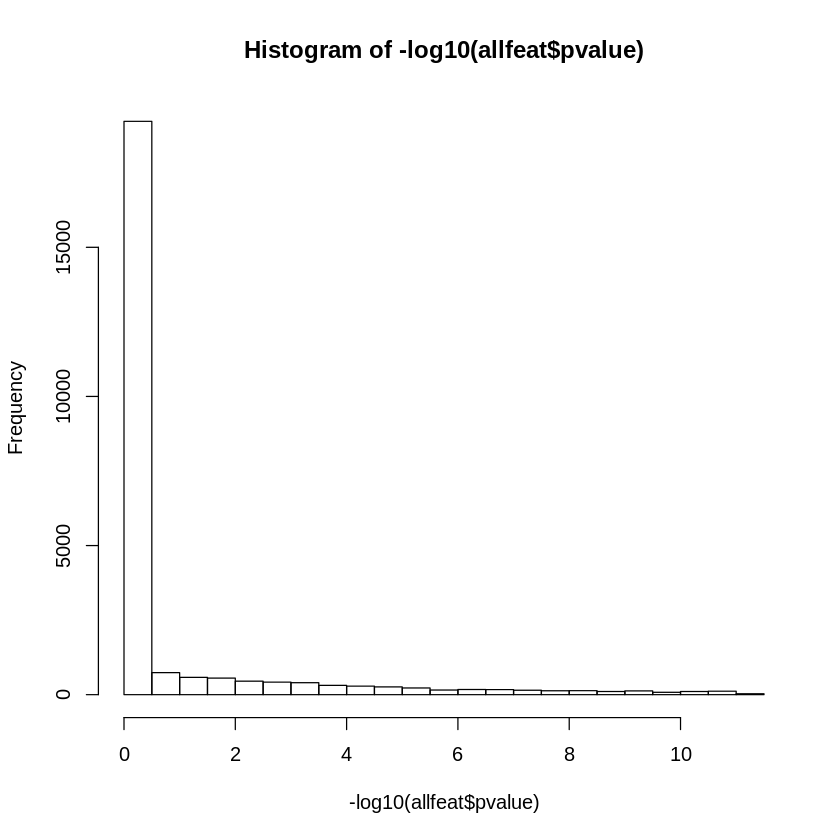

In [17]:
hist(-log10(allfeat$pvalue),breaks=20)

create histogram of correlation coefficients

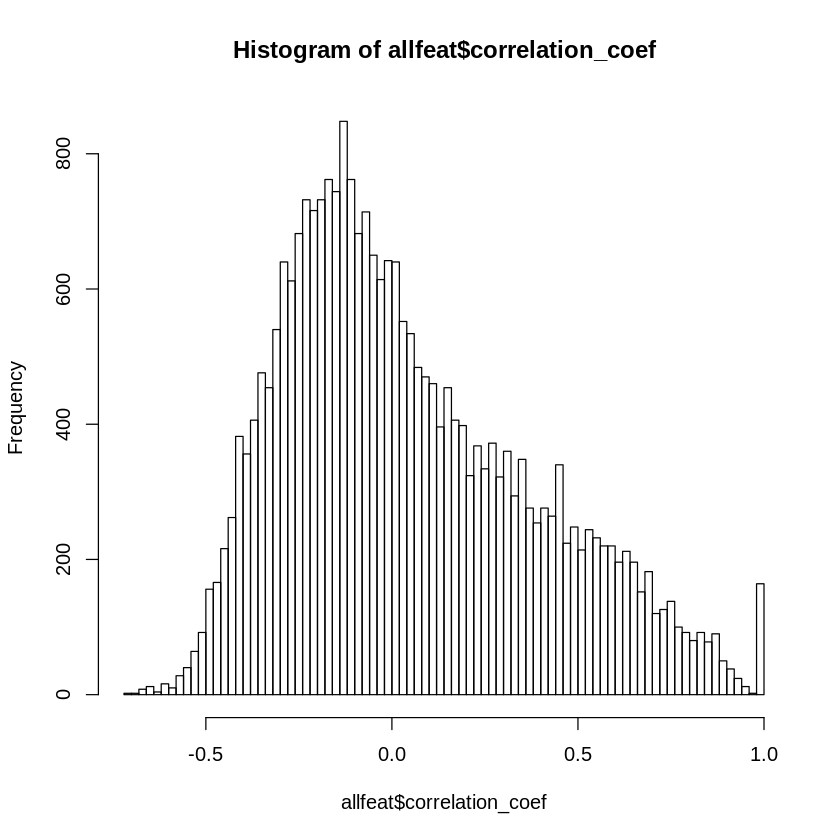

In [18]:
hist(allfeat$correlation_coef,breaks=100)